In [1]:
import pandas as pd 
클러스터링=pd.read_csv("c:/data/project/team/revised/클러스터링.csv",encoding='cp949',index_col=0) 
편의점=pd.read_csv("c:/data/project/team/revised/머신러닝용.csv",encoding='cp949',index_col=0) 


In [2]:
클러스터링=클러스터링.loc[:,['분류']].reset_index()


In [4]:
편의점최종=pd.merge(클러스터링,편의점)

In [13]:
매출이중간인상권=편의점최종[편의점최종['분류']==0]
매출이낮은상권=편의점최종[편의점최종['분류']==1]
매출이높은상권=편의점최종[편의점최종['분류']==2]


In [14]:
print(str(매출이낮은상권['점포별월매출금액'].min())+"에서"+str(매출이낮은상권['점포별월매출금액'].max()))
print(str(매출이중간인상권['점포별월매출금액'].min())+"에서"+str(매출이중간인상권['점포별월매출금액'].max()))
print(str(매출이높은상권['점포별월매출금액'].min())+"에서"+str(매출이높은상권['점포별월매출금액'].max()))
 


5384271.5에서203620341.1
203737008.4775에서412845590.65
416968948.045에서1063667246.2631578


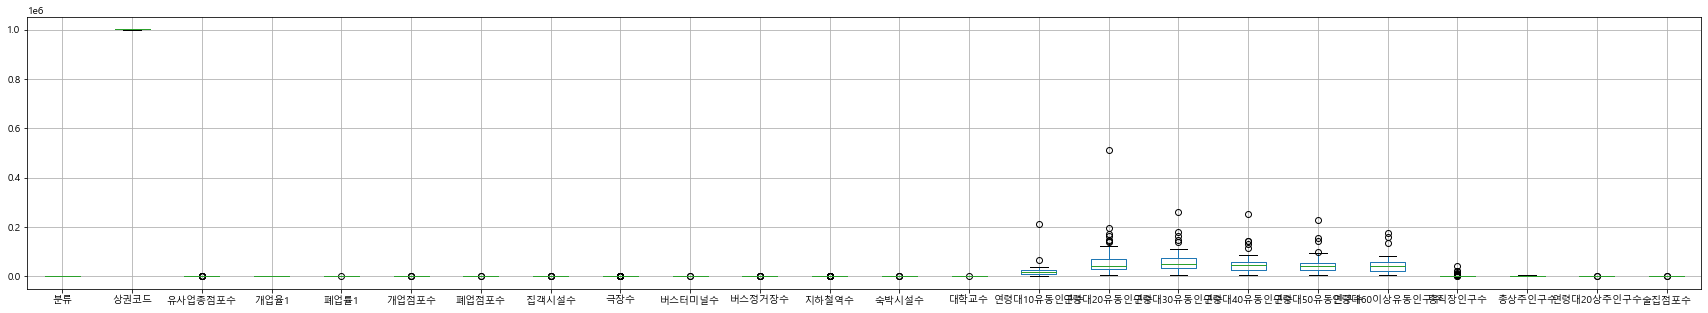

In [15]:
# 카페.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
매출이높은상권.iloc[:,:-1].boxplot(figsize=(30,5))

In [31]:
매출이높은상권.columns

Index(['상권코드명', '분류', '상권코드', '시군구명', '유사업종점포수', '개업율1', '폐업률1', '개업점포수',
       '폐업점포수', '집객시설수', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '대학교수',
       '연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수', '연령대40유동인구수', '연령대50유동인구수',
       '연령대60이상유동인구수', '총직장인구수', '총상주인구수', '연령대20상주인구수', '술집점포수', '점포별월매출금액'],
      dtype='object')

In [16]:
cols=[  '개업율1', '폐업률1',
        '집객시설수', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '대학교수', '총직장인구수', '총상주인구수', '술집점포수']
X=매출이높은상권[cols] #독립변수
y=매출이높은상권['점포별월매출금액'] #종속변수

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_train)
Xt_scaled=scaler.fit_transform(X_test)

In [19]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X.columns)


In [20]:
import statsmodels.api as sm 
model1=sm.OLS(y_train.values,X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              13.67
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                    7.02e-11
Time:                        14:55:11   Log-Likelihood:                         -1121.4
No. Observations:                  54   AIC:                                      2267.
Df Residuals:                      42   BIC:                                      2291.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
개업율1        2.333e+08   1.85e+08      1.264      0.213   -1.39e+08    6.06e+08
폐업률1        1.581e+08   1.65e+08      0.960      0.343   -1.74e+08    4.91e+08
집객시설수       4.576e+08   3.44e+08      1.332      0.190   -2.36e+08    1.15e+09
극장수         1.156e+08   5.18e+08      0.223      0.824   -9.29e+08    1.16e+09
버스터미널수       5.98e+08   3.48e+08      1.716      0.093   -1.05e+08     1.3e+09
버스정거장수     -7.179e+07   2.47e+08     -0.291      0.773    -5.7e+08    4.27e+08
지하철역수      -6.195e+06   2.05e+08     -0.030      0.976    -4.2e+08    4.07e+08
숙박시설수       2.207e+08   2.03e+08      1.086      0.283   -1.89e+08    6.31e+08
대학교수        3.256e+08   3.14e+08      1.038      0.305   -3.07e+08    9.58e+08
총직장인구수      1.273e+08   5.41e+08      0.235      0.815   -9.64e+08    1.22e+09
총상주인구수      4.114e+08    1.4e+08      2.948      0.005     1.3e+08    6.93e+08
술집점포수       2.774e+08   2.61e+08      1.063      0.294   -2.49e+08    8.04e+08
==============================================================================
Omnibus:                        4.312   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                3.248
Skew:                           0.507   Prob(JB):                        0.197
Kurtosis:                       3.644   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#다중공선성 문제를 해결하기 위하여 vif 확인
#vif(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train_scaled.values, i) for i in range(X.shape[1])]
vif['features']=X_train_scaled.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(50)

,VIF Factor,features
11,6.728532,집객시설수
10,6.061254,극장수
9,5.298946,총직장인구수
8,5.180939,버스정거장수
7,3.270748,술집점포수
6,3.124211,총상주인구수
5,2.845185,개업율1
4,2.619333,지하철역수
3,2.367306,폐업률1
2,1.572621,버스터미널수
